# Testing tools of RobotEnv

In [6]:
# importar librerias
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline, make_interp_spline 
import mujoco_py

from RobotEnv.tools.controllers import PID
from RobotEnv.tools import simulation
from RobotEnv.tools.controllers import Manipulator_Agent
from RobotEnv.tools.logger import Logger

import glfw


## Test PID

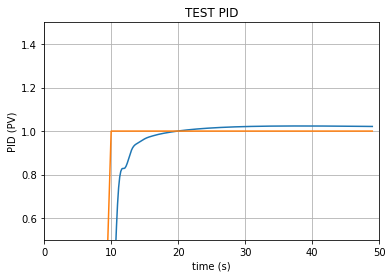

In [3]:
def main():

    L = 50
    pid = PID(P=0.7,I=1.5, D=0.001)

    pid.r_t = 0.0
    pid.set_sample_time(0.01)


    END = L
    y_t = 0

    y_t_list  = []
    time_list = []
    r_t_list = []

    for i in range(1, END):
        pid.update(y_t)
        u_t = pid.u_t
        if pid.r_t > 0:
            y_t += (u_t - (1/i))
        if  i > 9:
            pid.r_t = 1


        time.sleep(0.02)

        y_t_list.append(y_t)
        r_t_list.append(pid.r_t)
        time_list.append(i)

    time_sm = np.array(time_list)
    time_smooth = np.linspace(time_sm.min(), time_sm.max(), 300)

    helper_x3 = make_interp_spline(time_list, y_t_list)
    feedback_smooth = helper_x3(time_smooth)

    plt.plot(time_smooth, feedback_smooth)
    plt.plot(time_list, r_t_list)
    plt.xlim((0, L))
    plt.ylim((min(y_t_list)-0.5, max(y_t_list)+0.5))
    plt.xlabel('time (s)')
    plt.ylabel('PID (PV)')
    plt.title('TEST PID')

    plt.ylim((1-0.5, 1+0.5))

    plt.grid(True)
    plt.show()

if __name__ == '__main__':
    main()

## Test simulation

In [4]:
def main():
    
    #simulator
    sim = simulation.create_simulation('robotModelV2.xml')

    #viewer
    viewer = simulation.create_viewer(sim)

    print(sim)

if __name__ == '__main__':
    main()

Creating window glfw


## Test agent controller

In [5]:
def main():
    #simulator
    sim = simulation.create_simulation("robotModelV2.xml")
    
    #controller
    controller = Manipulator_Agent("../agents/ddpg4/pyt_save/model.pt", sim, 4, render=True)

    for i in range(10):
        controller.move_to(np.array([0.1, 0.1, 0.5]), timer=100)


    #para terminar la simulacion renderizada
    glfw.terminate()


if __name__ == '__main__':
    main()

Creating window glfw


## test plots

resuelto en: 0 seg
resuelto en: 0 seg
resuelto en: 0 seg
resuelto en: 0 seg
resuelto en: 0 seg


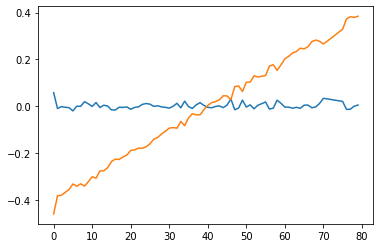

In [11]:
def main():
    #simulator
    sim = simulation.create_simulation("robotModelV2.xml")

    #controller
    controller = Manipulator_Agent("../agents/ddpg4/pyt_save/model.pt", sim, 4, render=False)

    # data recollector
    logger = Logger()
    output = []
    time_list = []
    x = [i/100 for i in range(-40,40)]


    for i in range(len(x)):
        controller.move_to(np.array([0.1, 0.1, 0.5]), timer=100)
        
        output.append(sim.data.get_body_xpos("left_inner_finger")[0].astype(np.float32))
        time_list.append(i)
        
    
    logger.plot_trajectory(time_list,  output)
    logger.plot_error(time_list, error_a=x, error_b=output)

    

    glfw.terminate()



if __name__ ==  '__main__':
    main()
